<font size="6">**Тестирование гипотез роста выручки\
Анализ результатов A/B-теста**</font>

# Описание проекта

**Цель**\
Поиск путей увеличения выручки интернет-магазина.

**Задачи**
- Ранжировать предложенные гипотезы по методикам ICE/RICE и выбрать наиболее приоритетные.
- Проанализировать результаты проведённого A/B-теста - изучить влияние предлагаемых новаций на поведение посетителей сайта - количество заказов на одного посетителя и средний размер чека.

**План**
- Изучение имеющихся данных и их предобработка.
- Приоритизация предложенных гипотез.
- Анализ результатов A/B-теста поведения посетителей интернет-магазина.
  - Исследование комулятивного среднего количества заказов на одного пользователя.
  - Исследованее комулятивного среднего чека.
  -  Определение статистической значимости различий в среднем количестве заказов по тестовым группам.
  -  Определение статистической значимости раздичий в среднем чеке по тестовым группам.

**Исходные данные**\
Имеются три датасета, содержащие следующую информацию:
- Датафрейм, содержащий 9 гипотез с RICE-параметрами.
- Данные о покупках клиентов, разделённых на две группы.
- Данные о ежедневном количестве участников A/B-теста по группам.

<div style="background-color: #99FFFF; padding: 10px;">

# Загрузка и изучение качества данных. Предобработка.

## Загрузка данных, изучение их качества.

In [7]:
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

from scipy import stats
import numpy as np

# Отображение вывода в той же ячейке
%matplotlib inline

# глобальный формат для десятичных дробей
pd.options.display.float_format = '{:.2f}'.format

# устанавливаем размер ячеек
pd.options.display.max_colwidth = 110

In [8]:
try:
    hypothesis_raw = pd.read_csv('hypothesis.csv')
except:
    hypothesis_raw = pd.read_csv('/datasets/hypothesis.csv')
try:
    orders_raw = pd.read_csv('orders.csv')
except:
    orders_raw = pd.read_csv('/datasets/orders.csv')
try:
    visitors_raw = pd.read_csv('visitors.csv')
except:
    visitors_raw = pd.read_csv('/datasets/visitors.csv')


In [9]:
# Смотрим исходные датасеты
display (hypothesis_raw)
display (orders_raw.head(3))
display (visitors_raw.tail(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [10]:
# Смотрим состав данных датасетов
print (hypothesis_raw.info())
print ('')
print (orders_raw.info())
print ('')
visitors_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 col

In [11]:
# Проверяем наличие полных дубликатов в датасетах.

duplicated_hypothesis_raw = hypothesis_raw.duplicated().sum()
display(f"Количество полных дубликатов в таблице hypothesis: {duplicated_hypothesis_raw}")
duplicated_orders_raw = orders_raw.duplicated().sum()
display(f"Количество полных дубликатов в таблице orders: {duplicated_orders_raw}")
duplicated_visitors_raw = visitors_raw.duplicated().sum()
display(f"Количество полных дубликатов в таблице visitors: {duplicated_visitors_raw}")

'Количество полных дубликатов в таблице hypothesis: 0'

'Количество полных дубликатов в таблице orders: 0'

'Количество полных дубликатов в таблице visitors: 0'

**Результат предварительной проверки данных**:
- Пропущенных данных в датасетах нет.
- Строк-дубликатов в датасетах нет.
- Выбросы проверим на следующих этапах.
- В таблице hypothesis имена столбцов с большой буквы. Это желательно откорректировать
- Даты представлены в формате object, что требует коррекции.

<div style="background-color: #99FFFF; padding: 10px;">

## Предобработка данных

In [15]:
# Для последующих операций с обработанными датафреймами вводим новые переменные.
hypothesis = hypothesis_raw.copy()
orders = orders_raw.copy()
visitors = visitors_raw.copy()

- Меняем формат дат на формат danetime.
- Приводим имена столбцов к нижнему регистру.

In [17]:
# Осуществляем запланированные действия по предобработке.
# Меняем формат даты
orders['date'] = pd.to_datetime(orders['date']).dt.normalize()
visitors['date'] = pd.to_datetime(visitors['date']).dt.normalize()

# приводим имена столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

Проверяем результат предобработки

In [19]:
# Проверяем результат

display (hypothesis.head(2))
print (orders.info())
print ('')
print (visitors.info())

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


**Проверяем, за какой период данные в датасетах orders и visitors.**

In [21]:
# Проверяем за один ли год данные
print (f"Данные orders представлены за  {orders['date'].dt.year.unique()}  год")
print (f"Данные orders представлены за  {orders['date'].dt.month.unique()}  месяц")
print (f"Данные visitors представлены за  {visitors['date'].dt.year.unique()}  год")
print (f"Данные visitors представлены за  {visitors['date'].dt.month.unique()}  месяц")

Данные orders представлены за  [2019]  год
Данные orders представлены за  [8]  месяц
Данные visitors представлены за  [2019]  год
Данные visitors представлены за  [8]  месяц


**Проверяем размеры и состав групп.**

In [23]:
print(f"Количество групп в тесте  {orders['group'].nunique()}")


Количество групп в тесте  2


In [24]:
group_A = orders.query("group == 'A'")
group_B = orders.query("group == 'B'")

print(f"Количество посетителей группы А {group_A['visitorId'].nunique()}")
print(f"Количество посетителей группы В  {group_B['visitorId'].nunique()}")
delta = (1-(group_A['visitorId'].nunique()/group_B['visitorId'].nunique()))*100 
print (f"Группа А меньше группы В на  {delta:.2f} процента")

Количество посетителей группы А 503
Количество посетителей группы В  586
Группа А меньше группы В на  14.16 процента


**Проверим, есть ли посетители, которые попали а в ту и в другую группу.**

In [26]:
# уникальные посетители из group_B
visitor_B = group_B['visitorId'].unique()

# фильтруем group_A, оставляя только тех посетителей, которце есть в visitor_ids_B
visitors_AB = group_A.query('visitorId in @visitor_B')

# количество уникальных visitorId в пересечении
visitors_AB_count = visitors_AB['visitorId'].nunique()

print(f"Количество посетителей, присутствующих в обеих группах: {visitors_AB_count}")


Количество посетителей, присутствующих в обеих группах: 58


Удаляем заказы "двойных посетителей", так как мы не знаем, в какую сторону ошибка - к какой группе они на самом деле относятся.\
После чего проверяем оставшееся количество участников теста.

In [28]:
# получаем уникальных посетителей из visitors_AB
mask = visitors_AB['visitorId'].unique()
# отфильтровываем из orders посетителей из списка mask
orders = orders[~orders['visitorId'].isin(mask)].reset_index(drop=True)

orders.shape

(1016, 5)

Было 1197 записей в таблице orders, осталось 1016. Мы потеряли 181 запись.\
То есть 15 процентов данных.\
Стоило бы проверить мощьность теста, но мы не располагаем достаточной для этого информацией.
Поэтому принимаем, что данных осталось достаточно для анализа теста.

**Результат предобработки и проверки временного диапазона**
- Изменён формат даты на формат danetime.
- Имена столбцов в hypothesis приведены к нижнему регистру.
- Временной период в датасетах совпадает - август 2019 года.
- Удалены посетители, присутствующие в обеих группах.

**Выводы**
- Группы теста неравные по объёму.
- Есть группа клиентов, попавшая в обе группы.
- > Удалив их, мы лишаемся 15% всех записей.

Всё это говорит о том, что тест не был подготовлен тщательным образом, не был проведён АА-тест.
Но мы, в рамках задачи, продолжим анализ на основе тех ланных, которыми располагаем после очистки.

<div style="background-color: #99FFFF; padding: 10px;">

# Приоритизация гипотез

Применяем фреймворки ICE и RICE и сравниваем результаты приоритезации разными методиками.
>**НЕ меняем индексы** после сортировки.\
> Первоначальные индексы удобны для сравнения положения гипотез после ранжирования\
>(Текстовое описание для индентификации менее удобно)

In [35]:
# Применяем фреймворк ICE

hypothesis_ICE = hypothesis.copy()
hypothesis_ICE['ICE'] = hypothesis_ICE['impact'] * hypothesis_ICE['confidence'] / hypothesis_ICE['efforts']
hypothesis_ICE = hypothesis_ICE.sort_values(by='ICE', ascending=False)#.reset_index(drop=True)

# Присваиваем ранги по столбцу ICE
hypothesis_ICE['ICE_Rank'] = hypothesis_ICE['ICE'].rank(ascending=False, method='first').astype(int)

display (hypothesis_ICE)

,hypothesis,reach,impact,confidence,efforts,ICE,ICE_Rank
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,2
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,9


In [36]:
print (f'Наиболее приоритетная гипотеза по ICE: "{hypothesis_ICE.iloc[0,0]}"')
print (f'Наименее приоритетная гипотеза по ICE: "{hypothesis_ICE.iloc[8,0]}"')

Наиболее приоритетная гипотеза по ICE: "Запустить акцию, дающую скидку на товар в день рождения"
Наименее приоритетная гипотеза по ICE: "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


- Положение наименее приоритетной теории (№4) обусловлено низкими оценками по всем показателям\
- Позиции трёх лидеров в основном определяются уровнями impact (влияние) и efforts (затраты).\
- Теория №0 проигрывает лидеру (№8) в основном из-за более высокой оценки требуемых затрат. 

In [38]:
# Применяем фреёмворки RICE
hypothesis_RICE = hypothesis.copy()
hypothesis_RICE['RICE'] = hypothesis_RICE['reach'] * hypothesis_RICE['impact'] * hypothesis_RICE['confidence'] / hypothesis_RICE['efforts']
hypothesis_RICE = hypothesis_RICE.sort_values(by='RICE', ascending=False)#.reset_index(drop=True)

# Присваиваем ранги по столбцу RICE
hypothesis_RICE['RICE_Rank'] = hypothesis_RICE['RICE'].rank(ascending=False, method='first').astype(int)

display (hypothesis_RICE)

,hypothesis,reach,impact,confidence,efforts,RICE,RICE_Rank
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.00,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.00,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.00,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.00,4
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.00,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.00,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.00,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.00,9


In [39]:
print (f'Наиболее приоритетная гипотеза по RICE: "{hypothesis_RICE.iloc[0,0]}"')
print (f'Наименее приоритетная гипотеза по RICE: "{hypothesis_RICE.iloc[8,0]}"')

Наиболее приоритетная гипотеза по RICE: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
Наименее приоритетная гипотеза по RICE: "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


- Положение наименее приоритетной теории (№4) осталось без изменений.
- Тройка лидеров изменилась - теперь это теории №№ 7, 2 и 0, которая опустилась со второго места на третье.

.

**Сравним результвты двух методик приоритизации**.\
Объединим результаты двух методик c исходным датафреймом (для сохранения индексации гипотез) и сравним рейтинги теорий.\
Сортируем по RICE.

In [42]:
hypothesis_ICE_RICE = hypothesis.merge(hypothesis_ICE[
         ['hypothesis', 'ICE_Rank']],on='hypothesis', how = 'left').merge(hypothesis_RICE[
         ['hypothesis', 'RICE_Rank']], on='hypothesis', how = 'left').sort_values(by='RICE_Rank', ascending=True)

hypothesis_ICE_RICE

,hypothesis,reach,impact,confidence,efforts,ICE_Rank,RICE_Rank
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,3,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,5,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,4,4
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,1,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,6,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,7,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,9,9


**Наблюдения**\
Мы видим влияние показателя reach (охват) на изменение приоритетности гипотез.\
**Благодаря высокой оценке охвата**:
- гипотеза №7 поднялась с 3-го места на 1-е,
- гипотеза №2 поднялась с 5-го на 2-е место,
- приоритет гипотезы №8 - лидера по методике ICE - понизился по RICE до 5-го места.
 

**Выводы**\
Для интернет-магазина методика приоритизации RICE более предпочтитела, чем ICE, так как:
- размер аудитории работающего интернет-магазина легко оценить,
- все гипотезы направлены на конкретные сегменты аудитории, размер которых можно определить.
- метрика reach делает расчет более точным, поэтому исключать её нецелесообразно.

**Таким образом, более адекватным результатом приоритизации предлагается считать расчёт, сделанный по методике  RICE.** 


<div style="background-color: #99FFFF; padding: 10px;">

# Анализ A/B-теста

## График кумулятивной выручки по группам

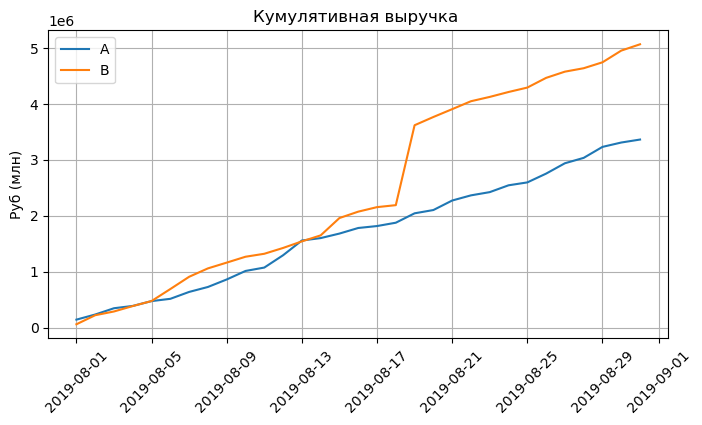

In [48]:
# создаём датасеты комулятивных данных orders и visitors
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({'date': 'max',
         'group': 'max',
         'transactionId': 'nunique',
         'visitorId': 'nunique',
         'revenue': 'sum'}),axis=1).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({'date': 'max',
         'group': 'max',
         'visitors': 'sum'}),axis=1).sort_values(by=['date', 'group'])

# объединяем датасеты в один
cumulativeData = ordersAggregated.merge(
                 visitorsAggregated, on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders','buyers', 'revenue', 'visitors',]

# выделяем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# выделяем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# задаём параметряя графика и строим его
plt.figure(figsize=(8, 4))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка ')
plt.xlabel('')
plt.ylabel('Руб (млн)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

**Наблюдения**
- Группа A ведёт себя стабильно - накопленная выручка растёт равномерно.
- В группе B наблюдается скачёк 18 августа и дальше график равномерно растёт. Это свидетельствует либо о оезком росте количества заказов, либо о наличии аномально больших заказов, которые нужно будет проанализировать отдельно.

## График кумулятивного среднего чека по группам

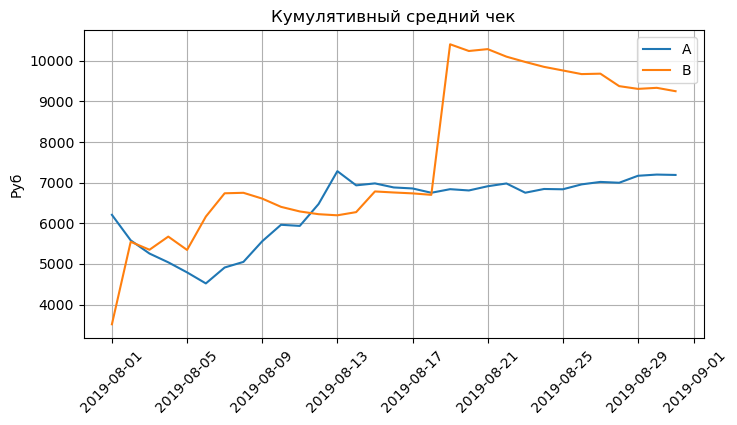

In [51]:
# задаём параметры графика и строим его
plt.figure(figsize=(8, 4))

# делим комулятивную выручку на комулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек')
plt.xlabel('')
plt.ylabel('Руб')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

**Наблюдения**
- Имеются сильные колебания среднего чека как в той, так и в другой группе.
- В группе B - скачёк 18 августа и дальше график падает.
  >Это подтверждает наличие аномально больших заказов, а не рост их количества.

## График относительного изменения кумулятивного среднего чека группы B к группе A

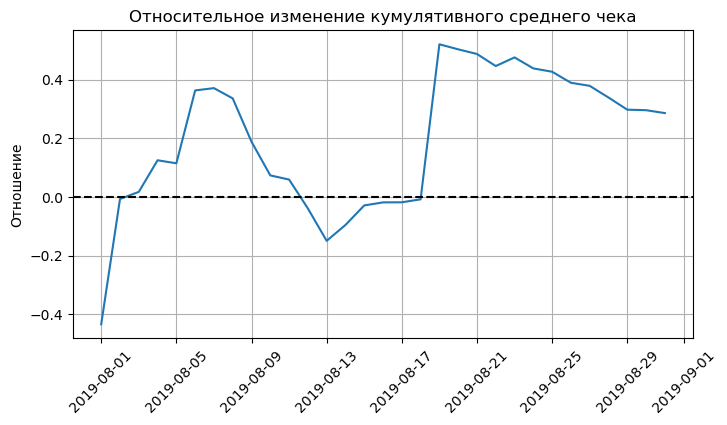

In [54]:
# собираём данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

# cтроим график отношения средних чеков
plt.figure(figsize=(8, 4))
plt.plot(
         mergedCumulativeRevenue['date'],
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
       /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
        )

# добавляем нулевую ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('')
plt.ylabel('Отношение')
plt.xticks(rotation=45)
#plt.legend()
plt.grid()
plt.show()

**Наблюдения**
- В целом за время теста в группе В средний чек выше. Но отношение неравномерно.
- Имеется провал с 8-го по 13-е августа - разрыв уменьшается и даже становится в пользу группы А.
- Есть скачёк 18 августа и дальнейшее плавное снижение.\
  В этом график подобен поведению комулятивнго среднего чека группы В. Причина, как мы уже видели, - наличие аномально крупных заказов.

## График кумулятивного среднего количества заказов на посетителя по группам

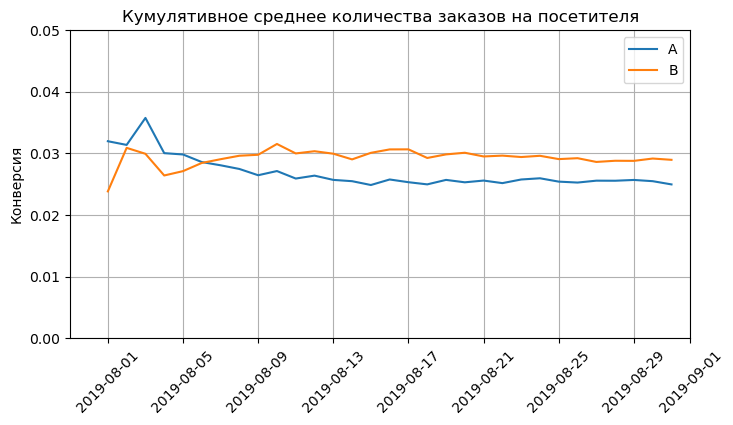

In [57]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# выделяем данные группы A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# выделяем данные группы B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(8, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаём масштаб осей
plt.axis(["2019-07-30", '2019-09-01', 0, 0.05])

plt.title('Кумулятивное среднее количества заказов на посетителя')
plt.xlabel('')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

**Наблюдения**\
Показатель конверсии стабилизаровался к концу второй недели теста.\
Группа В стабильно оппережает группу А.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A


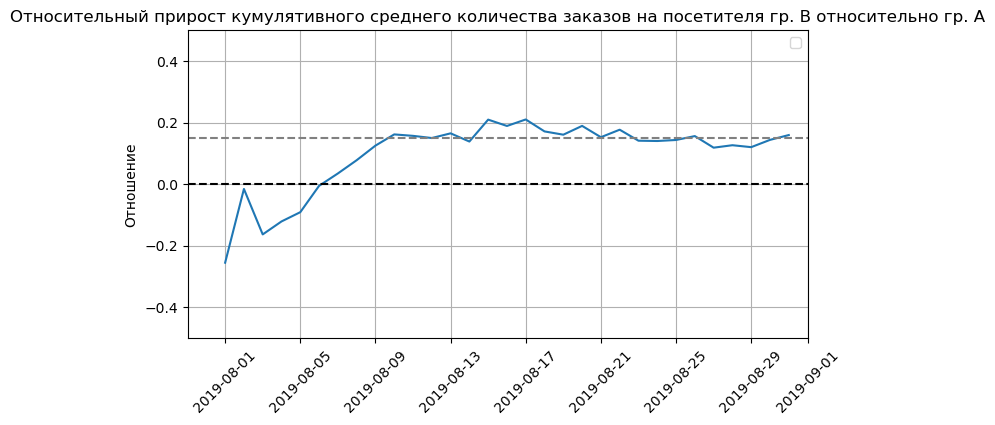

In [60]:
# создаём датафрейм
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

# задаём параметры графика и строим его
plt.figure(figsize=(8, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-07-30", '2019-09-01', -0.5, 0.5])

plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя гр. B относительно гр. A')
plt.xlabel('')
plt.ylabel('Отношение')
plt.xticks(rotation=45)
plt.legend('')
plt.grid()
plt.show()

Показатель группы В стабильно выше, чем группы А.\
Начиная со второй недели метрика стабилизировалась вокруг значения +15%,

## Точечный график количества заказов по пользователям.

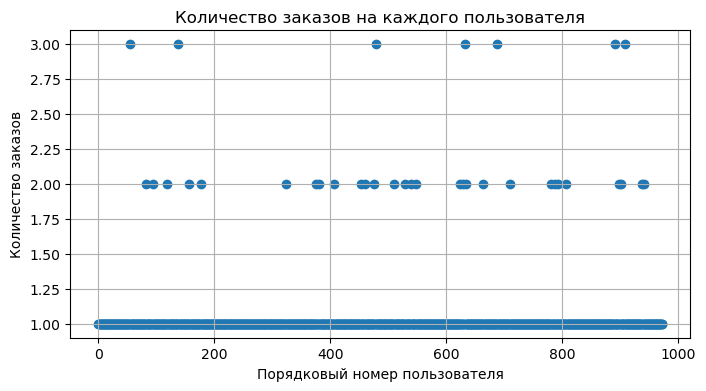

In [63]:
# строим тпблицу ordersByUsers
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['userId', 'orders']

#print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до макс. кол-ва наблюдений
x_values = pd.Series(range(0, len(ordersByUsers)))

# строим график
plt.figure(figsize=(8, 4))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Количество заказов на каждого пользователя')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

Присутствуют выбросы - есть пользователи, сделавшие большое количество заказов - от 5 и выше.

## 95-й и 99-й перцентили количества заказов на пользователя.

In [66]:
# Методом np.percentile находим перцентили
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


- Не более 5% покупателей совершили больше 1 заказа.
- Не более 1% пользователей совершили больше 2 покупок.

Выберем границей, выше которой количество будем считать аномальным, 2 заказа.\
Больше этого количество заказывало только 1% пользователей.

## Точечный график стоимостей заказов.

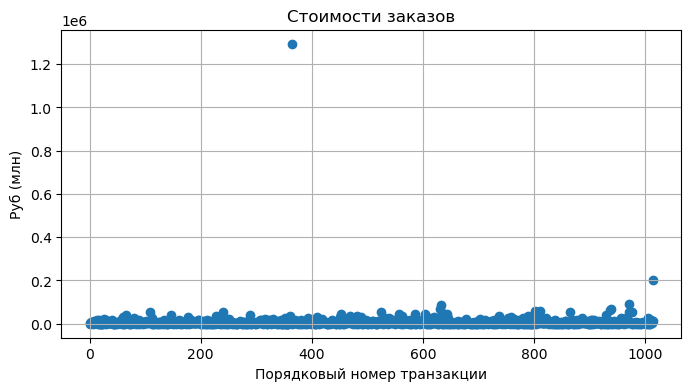

In [69]:
# строим график
# серия из чисел от 0 до макс. кол-ва наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(8, 4))
plt.scatter(x_values, orders['revenue'])

plt.title('Стоимости заказов')
plt.xlabel('Порядковый номер транзакции')
plt.ylabel('Руб (млн)')
plt.grid()
plt.show()

Есть аномальные выбросы.

## 95-й и 99-й перцентили стоимости заказов.

In [72]:
# Методом np.percentile находит перцентили
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


- Не более 5% транзакций больше 26785 руб.
- Не более 1% транзакций больш 53904 руб.

Выыберем границей, выше которой сумму заказа будем считать аномальным, 26785 руб.\
Больше этой суммы только 5% заказов.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы для обеих метрик.
- Нулевая - различия метрик между группами нет.
- Альтернативная - различия метрик между группами есть.

In [76]:
# создаём необходимые датафреймы
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA','revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

# объединяем в один датафрейм
data = (ordersADaily.merge(ordersBDaily, on='date', how='left')
                    .merge(ordersACummulative, on='date', how='left')
                    .merge(ordersBCummulative, on='date', how='left')
                    .merge(visitorsADaily, on='date', how='left')
                    .merge(visitorsBDaily, on='date', how='left')
                    .merge(visitorsACummulative, on='date', how='left')
                    .merge(visitorsBCummulative, on='date', how='left'))

#print(data.head(5))

In [77]:
# готовим выборки количества заказов по группам теста
ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0,
            index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                           ), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0,
            index=np.arange (data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                            ), name='orders')], axis=0)
#sampleB

In [78]:
# cчитаем статистику применяя статистический критерий Манна-Уитни
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
differenceBA = sampleB.mean() / sampleA.mean() - 1

# выводим результаты
alpha = 0.05
print(f"p-значение: {p_value:.3f}")
print(f"Относительное различие групп: {differenceBA:.2f}")
print()
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Есть значимые различия средних количеств заказов между группами')
else:
    print('Не отвергаем нулевую гипотезу. Нет значимых различий средних количеств заказов между группами')
print('по "сырым" данным')

p-значение: 0.011
Относительное различие групп: 0.16

Отвергаем нулевую гипотезу. Есть значимые различия средних количеств заказов между группами
по "сырым" данным


**Наблюдения**\
Есть значимое различие между средними количествами заказов по группам.\
**В группе В, по "сырым" данным, среднее количество заказов на одного посетителя на 16% выше.**

## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [81]:
# cчитаем статистику применяя статистический критерий Манна-Уитни
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
differenceBA = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

# выводим результаты
alpha = 0.05
print(f"p-значение: {p_value:.3f}")
print(f"Относительное различие групп: {differenceBA:.2f}")
print()
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Есть значимые различия в средних чеках между группами.')
else:
    print('Не отвергаем нулевую гипотезу. Нет значимых различий в средних чеках между группами.')
print('по "сырым" данным')

p-значение: 0.829
Относительное различие групп: 0.29

Не отвергаем нулевую гипотезу. Нет значимых различий в средних чеках между группами.
по "сырым" данным


**Наблюдения**\
По "сырым" данным разница между группами по среднему чеку составляет 29% в пользу нруппы В\
Однако эта разница не является статистически значимой и не выходит за пределы случайных отклонений.\
**В группе В, по "сырым" данным, средний чек не отличается от группы А.**

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [84]:
# собираем посетителей с аномальными данными в датафрейм abnormalUsers
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates().sort_values()
                )

# выделяем "очищенные" группы А и В
sampleAFiltered = pd.concat(
            [ordersByUsersA[
             np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
             pd.Series(0, index=np.arange(
                 data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0
                           )

sampleBFiltered = pd.concat(
            [ordersByUsersB[
             np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
             pd.Series(0, index=np.arange(
                 data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0
                           )

In [85]:
# cчитаем статистику применяя статистический критерий Манна-Уитни и выводим результаты

p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
differenceBA = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

alpha = 0.05
print(f"p-значение: {p_value:.3f}")
print(f"Относительное различие групп: {differenceBA:.3f}")
print()
if p_value < alpha:
    print('Отклоняем нулевую гипотезу. Есть значимые различия средних количеств заказов между группами')
else:
    print('Не удаётся отклонить нулевую гипотезу. Нет значимых различий средних количеств заказов между группами')
print('по "очищенным" данным')

p-значение: 0.012
Относительное различие групп: 0.182

Отклоняем нулевую гипотезу. Есть значимые различия средних количеств заказов между группами
по "очищенным" данным


**Наблюдения**\
**Имеется разница между группами по среднему количеству заказов в пользу нруппы В.**\
По "очищенным" данным она составляет 18%, что больше, чем по "сырым" данным (16%).

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [88]:
# cчитаем статистику применяя статистический критерий Манна-Уитни
p_value = (
            stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
          )  


differenceBA = (
                orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
              / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1
               )

# выводим результаты
alpha = 0.05
print(f"p-значение: {p_value:.3f}")
print(f"Относительное различие групп: {differenceBA:.3f}")
print()
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Есть значимые различия в средних чеках между группами.')
else:
    print('Не отвергаем нулевую гипотезу. Нет значимых различий в средних чеках между группами.')
print('по "очищенным" данным')

p-значение: 0.646
Относительное различие групп: -0.048

Не отвергаем нулевую гипотезу. Нет значимых различий в средних чеках между группами.
по "очищенным" данным


**Наблюдения**\
По "очищенным" данным разница между группами по среднему чеку составляет 4,8% в пользу нруппы А.\
Эта разница не является статистически значимой и находится в пределах случайных отклонений.\
**В группе В, по "очищенным" данным, средний чек НЕ отличается от группы А.**

<div style="background-color: #99FFFF; padding: 10px;">

# A/B-тест -- итоги и выводы

**Качество данных:**
- Группы теста не равны по объёму.
- Есть группа клиентов, попавшая в обе группы.

Это говорит о том, что тест не был подготовлен тщательным образом, не был проведён АА-тест.\
Можно рекомендовать доработать техническую реализацию теста и  провести тест повторно на других посетителях.

Но, тем не менее, анализ был осуществлён на основе тех ланных, которые бали получены после их очистки.

**Итоги:**\
**среднее количество заказов на одного посетителя**
- по "сырым" данным -- группа В > группы А на 16%
- по "очищенным" данным -- группа В > группы А на 18%

**средний чек**
- по "сырым" данным -- группа В = группе А
- по "очищенным" данным -- группа В = группе А
  

**Вывод:**
> Мы знаем, что в расчётах использовался уровень ошибки первого рода (вероятность обнаружить отличия, когда их нет) в 5%.\
> Однако мы не знаем уровень ошибки втоого рода (вероятность не обнаружить отличия, когда они есть), применённый при определении объёма выборки. Поэтому в анализе результатов предположим уровень ошибки второго рода на уровне 20%..

Таким образом, можно утверждать, что тестируемые изменения привели к росту количества заказов на одного посетителя на 17,3% (с вероятностью ошибки 5%)\
и не повлияли на средний чек (с вероятностью ошибки до 20%).

**Решение:**\
Остановить тест, зафиксировать победу группы В по показателю "Количество заказов на одного посетителя".\
При этом показатель "Средний чек" в группах А и В не имеет значимых различий.
